# XGBoost - diabetes (Regression)
[ch5-advanced-xgboost-unveiled.ipynb](https://github.com/kyopark2014/ML-Algorithms/blob/main/xgboost/src/ch5-advanced-xgboost-unveiled.ipynb)

In [1]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
X, y = datasets.load_diabetes(return_X_y=True)

In [3]:
pd.DataFrame(y).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [4]:
pd.DataFrame(y).value_counts()

200.0    6
72.0     6
178.0    5
71.0     5
90.0     5
        ..
199.0    1
201.0    1
208.0    1
209.0    1
25.0     1
Length: 214, dtype: int64

In [5]:
pd.DataFrame(y).head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [6]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [7]:
pd.DataFrame(y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


### cross_val_score

In [8]:
from xgboost import XGBRegressor

xgb = XGBRegressor(max_depth=6, learning_rate=0.1, n_estimators=100, n_jobs=-1)

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=5)

rmse = np.sqrt(-scores)
print('RMSE:', np.round(rmse, 3))
print('Avg. RMSE: %0.3f' % (rmse.mean()))

RMSE: [63.033 59.689 64.538 63.699 64.661]
Avg. RMSE: 63.124


In [10]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 6,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

### regression_model

In [11]:
from sklearn.model_selection import KFold, StratifiedKFold

kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [12]:
def regression_model(model):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)

    rmse = np.sqrt(-scores)
    print('RMSE:', np.round(rmse, 3))
    print('Avg. RMSE: %0.3f' % (rmse.mean()))

    return rmse.mean()

In [13]:
regression_model(XGBRegressor(booster='gblinear'))

RMSE: [ 668.43   768.598   58.195 2869.2     57.941]
Avg. RMSE: 884.473


884.47273399561

In [14]:
regression_model(XGBRegressor(booster='gbtree'))

RMSE: [66.171 62.501 63.091 68.682 69.386]
Avg. RMSE: 65.966


65.96608449382913

In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression

regression_model(LinearRegression())

RMSE: [55.628 54.311 56.36  54.187 57.06 ]
Avg. RMSE: 55.509


55.50927267834349

In [16]:
from sklearn.linear_model import Lasso

regression_model(Lasso())

RMSE: [61.039 61.018 65.819 60.304 65.065]
Avg. RMSE: 62.649


62.64900771743497

In [17]:
from sklearn.linear_model import Ridge

regression_model(Ridge())

RMSE: [57.2   57.833 60.347 58.486 60.31 ]
Avg. RMSE: 58.835


58.83525077919003

### HPO

In [18]:
import time
from sklearn.model_selection import GridSearchCV

def grid_search(params, reg=XGBRegressor(booster='gblinear')):
    grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', cv=kfold)
    start = time.time()
    
    grid_reg.fit(X, y)

    best_params = grid_reg.best_params_
    print("best parameter:", best_params)
    
    best_score = np.sqrt(-grid_reg.best_score_)
    print("best accuracy:", best_score)    
    print('Elased time: %0.2fs' % (time.time()-start))

In [19]:
grid_search(params={'reg_alpha':[0.001, 0.01, 0.1, 0.5, 1, 5]})

best parameter: {'reg_alpha': 0.1}
best accuracy: 55.723182955758546
Elased time: 11.14s


In [20]:
grid_search(params={'reg_lambda':[0.001, 0.01, 0.1, 0.5, 1, 5]})

best parameter: {'reg_lambda': 0.001}
best accuracy: 56.17163583311746
Elased time: 11.03s


In [21]:
grid_search(params={'feature_selector':['shuffle']})

best parameter: {'feature_selector': 'shuffle'}
best accuracy: 1327.7817152043433
Elased time: 2.27s


In [22]:
grid_search(params={'feature_selector':['random', 'greedy', 'thrifty'], 
                    'updater':['coord_descent'] })

best parameter: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
best accuracy: 55.48798105805444
Elased time: 6.10s


In [23]:
grid_search(params={'feature_selector':['greedy', 'thrifty'], 
                    'updater':['coord_descent'], 'top_k':[3, 5, 7, 9]})

best parameter: {'feature_selector': 'thrifty', 'top_k': 3, 'updater': 'coord_descent'}
best accuracy: 55.478623763746256
Elased time: 15.08s


In [24]:
param_grid = [{'updater':['shotgun'],
               'feature_selector':['cyclic', 'shuffle']},
              {'updater':['coord_descent'],
               'feature_selector':['random', 'greedy', 'thrifty']}]
grid_search(params=param_grid)

best parameter: {'feature_selector': 'thrifty', 'updater': 'coord_descent'}
best accuracy: 55.48798105805444
Elased time: 9.69s


In [25]:
X = np.arange(1,100)
np.random.seed(2) 
y = []
for i in X:
    y.append(i*np.random.uniform(-0.2, 0.2))
y = np.array(y)
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

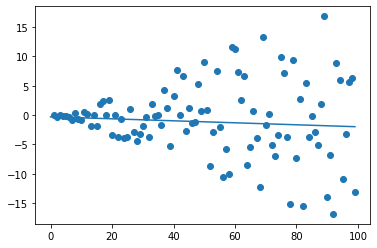

In [26]:
import matplotlib.pyplot as plt

xgbr = XGBRegressor(booster='gblinear')
xgbr.fit(X, y)

plt.scatter(X, y)
plt.plot((0, 99), (xgbr.intercept_, xgbr.coef_*99+xgbr.intercept_))
plt.show()

In [27]:
regression_model(XGBRegressor(booster='gblinear'))

RMSE: [7.077 5.106 5.742 7.101 6.048]
Avg. RMSE: 6.215


6.214946302686011

In [28]:
regression_model(XGBRegressor(booster='gbtree'))

RMSE: [11.508  7.9    7.607 11.798  8.049]
Avg. RMSE: 9.372


9.372359516507444

In [29]:
regression_model(LinearRegression())

RMSE: [7.077 5.106 5.742 7.101 6.048]
Avg. RMSE: 6.215


6.214962315808842

### booster: dart

In [30]:
X, y = datasets.load_diabetes(return_X_y=True)

In [31]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5))

RMSE: [67.063 60.985 60.325 64.949 68.029]
Avg. RMSE: 64.270


64.27033739377164

In [32]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5, sample_type='weighted'))

RMSE: [68.332 62.433 59.555 65.938 67.63 ]
Avg. RMSE: 64.778


64.77758988457283

In [33]:
regression_model(XGBRegressor(booster='dart', rate_drop=0.5, normalize_type='forest'))

RMSE: [66.897 59.292 59.673 63.569 67.365]
Avg. RMSE: 63.359


63.35922809798802

In [34]:
regression_model(XGBRegressor(booster='dart', one_drop=1))

RMSE: [65.728 61.925 60.191 62.742 63.278]
Avg. RMSE: 62.773


62.772860826030296

In [35]:
grid_search(params={'rate_drop':[0.01, 0.1, 0.2, 0.4]}, 
            reg=XGBRegressor(booster='dart', one_drop=1))

best parameter: {'rate_drop': 0.2}
best accuracy: 61.71159070206184
Elased time: 13.13s


In [36]:
grid_search(params={'skip_drop': [0.01, 0.1, 0.2, 0.4]}, 
            reg=XGBRegressor(booster='dart', rate_drop=0.2, one_drop=1))

best parameter: {'skip_drop': 0.01}
best accuracy: 62.21768657853914
Elased time: 14.59s


In [37]:
regression_model(XGBRegressor(booster='gbtree', num_parallel_tree=25))

RMSE: [66.169 62.708 63.009 68.783 69.355]
Avg. RMSE: 66.005


66.00488961672875

In [38]:
from xgboost import XGBRFRegressor

regression_model(XGBRFRegressor())

RMSE: [60.713 56.408 56.539 60.175 63.699]
Avg. RMSE: 59.507


59.506917961367165

In [39]:
from sklearn.ensemble import RandomForestRegressor

regression_model(RandomForestRegressor())

RMSE: [60.318 56.823 56.646 61.059 62.482]
Avg. RMSE: 59.466


59.46563031802505